<a href="https://colab.research.google.com/github/naveendhanush2505/Weather-App/blob/main/Athletes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Importing models from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(42)

In [4]:
# Bring in the data
df = pd.read_csv('/content/sample_data/train.csv')

# Print the columns to check if 'fitness_id' exists
print(df.columns)

# Drop pose_id column if it exists; otherwise, print a message
if 'fitness_id' in df.columns:
    df.drop('fitness_id', axis=1, inplace=True)
else:
    print("'fitness_id' column not found in the DataFrame.")

df.head()

Index(['pose_id', 'pose', 'x_nose', 'y_nose', 'z_nose', 'x_left_eye_inner',
       'y_left_eye_inner', 'z_left_eye_inner', 'x_left_eye', 'y_left_eye',
       ...
       'z_left_heel', 'x_right_heel', 'y_right_heel', 'z_right_heel',
       'x_left_foot_index', 'y_left_foot_index', 'z_left_foot_index',
       'x_right_foot_index', 'y_right_foot_index', 'z_right_foot_index'],
      dtype='object', length=101)
'fitness_id' column not found in the DataFrame.


,pose_id,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
0,0,squats_up,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,...,33.283375,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140
1,1,situp_down,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,...,-8.073100,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070
2,2,situp_down,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,...,-132.024460,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830
3,3,jumping_jacks_up,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,...,51.615970,-15.543400,38.251835,34.033176,16.610210,46.572014,38.680614,-18.784650,45.098710,20.343110
4,4,jumping_jacks_down,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,...,-2.849554,2.811829,56.000500,56.605590,0.566345,66.231050,-19.252045,-3.451297,60.029484,45.503677


In [5]:
# Sorting the null values
df.isnull().sum().sort_values(ascending=False)

,0
pose_id,0
pose,0
x_nose,0
y_nose,0
z_nose,0
...,...
y_left_foot_index,0
z_left_foot_index,0
x_right_foot_index,0
y_right_foot_index,0


In [6]:
# couting the values in pose
if 'pose' in df.columns:
    df['pose'].value_counts()  # Changed 'fitness' to 'pose'
else:
    print("'pose' column not found in the DataFrame. Check the actual column name.")

# If the column name is something else,
# replace 'pose' with the correct column name in the code above.

# To see all column names:
print(df.columns)


Index(['pose_id', 'pose', 'x_nose', 'y_nose', 'z_nose', 'x_left_eye_inner',
       'y_left_eye_inner', 'z_left_eye_inner', 'x_left_eye', 'y_left_eye',
       ...
       'z_left_heel', 'x_right_heel', 'y_right_heel', 'z_right_heel',
       'x_left_foot_index', 'y_left_foot_index', 'z_left_foot_index',
       'x_right_foot_index', 'y_right_foot_index', 'z_right_foot_index'],
      dtype='object', length=101)


In [7]:
# couting the values in pose
df['pose'].value_counts()

,count
pose,
jumping_jacks_down,151
jumping_jacks_up,145
pullups_down,123
pushups_up,115
squats_up,111
pullups_up,108
squats_down,101
situp_down,82
pushups_down,82


In [8]:
# creating labels for groups of poses

# Creating a new column for the groups
df['exercise'] = np.nan

# If the pose contains the word 'squat' then the exercise is squats
df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'
df.loc[df['pose'].str.contains('jumping_jacks'), 'exercise'] = 'jumping jacks'
df.loc[df['pose'].str.contains('push_up'), 'exercise'] = 'push ups'
df.loc[df['pose'].str.contains('situp'), 'exercise'] = 'sit ups'
df.loc[df['pose'].str.contains('pullups'), 'exercise'] = 'pull ups'
# Checking the new column
df.head()

<ipython-input-8-75e50b412530>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'squats' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'


,pose_id,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,...,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index,exercise
0,0,squats_up,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,...,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140,squats
1,1,situp_down,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,...,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070,sit ups
2,2,situp_down,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,...,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830,sit ups
3,3,jumping_jacks_up,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,...,-15.543400,38.251835,34.033176,16.610210,46.572014,38.680614,-18.784650,45.098710,20.343110,jumping jacks
4,4,jumping_jacks_down,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,...,2.811829,56.000500,56.605590,0.566345,66.231050,-19.252045,-3.451297,60.029484,45.503677,jumping jacks


In [9]:
# Counting the values of exercise
df['exercise'].value_counts()

,count
exercise,
jumping jacks,296
pull ups,231
squats,212
sit ups,161


In [36]:
def get_data():
    # Bring in the data
    df = pd.read_csv('/content/sample_data/train.csv')
    # Drop pose_id column
    df.drop('pose_id', axis=1, inplace=True)
    # Creating a new column for the groups
    df['exercise'] = np.nan
    # If the pose contains the word 'squat' then the exercise is squats
    df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'
    df.loc[df['pose'].str.contains('jumping_jacks'), 'exercise'] = 'jumping jacks'
    df.loc[df['pose'].str.contains('pushup'), 'exercise'] = 'push ups'
    df.loc[df['pose'].str.contains('situp'), 'exercise'] = 'sit ups'
    df.loc[df['pose'].str.contains('pullups'), 'exercise'] = 'pull ups'
    # Dropping pose column
    df.drop('pose', axis=1, inplace=True)

    # going to use LabelEncoder to encode the exercise column
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['exercise'] = le.fit_transform(df['exercise'])

    return df

<ipython-input-36-c0b597833c67>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'squats' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy score is:  0.7727272727272727
The confusion matrix is:  [[49  4  1  0  5]
 [ 3 28  0  4  7]
 [ 0  2 38  1  1]
 [ 1  4  1 23  6]
 [ 6  3  0  1 32]]
The classification report is:                precision    recall  f1-score   support

           0       0.83      0.83      0.83        59
           1       0.68      0.67      0.67        42
           2       0.95      0.90      0.93        42
           3       0.79      0.66      0.72        35
           4       0.63      0.76      0.69        42

    accuracy                           0.77       220
   macro avg       0.78      0.76      0.77       220
weighted avg       0.78      0.77      0.77       220



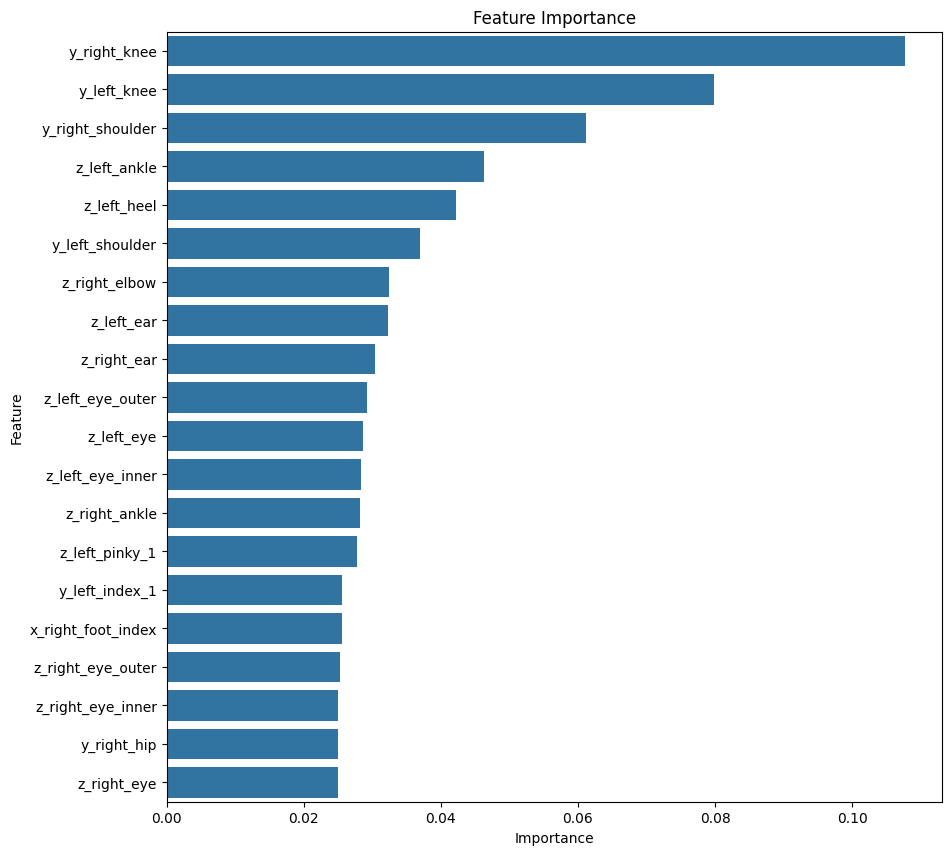

In [37]:
def log_reg():
    # Get the data
    df = get_data()

    # Define X and y
    X = df.drop('exercise', axis=1)
    y = df['exercise']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added this line

    # Creating a Logistic Regression model
    log_reg = LogisticRegression()
    # Fitting the model
    log_reg.fit(X_train, y_train)
    # Getting the accuracy score
    print('The accuracy score is: ', accuracy_score(y_test, log_reg.predict(X_test)))
    # Creating a confusion matrix
    print('The confusion matrix is: ', confusion_matrix(y_test, log_reg.predict(X_test)))
    # Creating a classification report
    print('The classification report is: ', classification_report(y_test, log_reg.predict(X_test)))

    # Putting the feature importance into a dataframe
    feature_importance = pd.DataFrame(log_reg.coef_, columns=X.columns)

    # Sorting the values to include top 20
    feature_importance = feature_importance.T.sort_values(by=0, ascending=False).head(20)

    # Plotting the feature importance
    plt.figure(figsize=(10, 10))
    sns.barplot(x=feature_importance[0], y=feature_importance.index)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

log_reg()

In [38]:
def get_data():
    # Bring in the data
    df = pd.read_csv('/content/sample_data/train.csv')
    # Drop pose_id column
    df.drop('pose_id', axis=1, inplace=True)
    # Creating a new column for the groups
    df['exercise'] = np.nan
    # If the pose contains the word 'squat' then the exercise is squats
    df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'
    df.loc[df['pose'].str.contains('jumping_jacks'), 'exercise'] = 'jumping jacks'
    df.loc[df['pose'].str.contains('pushup'), 'exercise'] = 'push ups'
    df.loc[df['pose'].str.contains('situp'), 'exercise'] = 'sit ups'
    df.loc[df['pose'].str.contains('pullups'), 'exercise'] = 'pull ups'
    # Dropping pose column
    df.drop('pose', axis=1, inplace=True)

    # going to use LabelEncoder to encode the exercise column
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['exercise'] = le.fit_transform(df['exercise'])

    return df


<ipython-input-38-c0b597833c67>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'squats' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'


The accuracy score is:  0.7227272727272728
The confusion matrix is:  [[40  3  0  0 16]
 [ 4 23  1  2 12]
 [ 0  1 39  1  1]
 [ 0  6  2 21  6]
 [ 4  1  0  1 36]]
The classification report is:                precision    recall  f1-score   support

           0       0.83      0.68      0.75        59
           1       0.68      0.55      0.61        42
           2       0.93      0.93      0.93        42
           3       0.84      0.60      0.70        35
           4       0.51      0.86      0.64        42

    accuracy                           0.72       220
   macro avg       0.76      0.72      0.72       220
weighted avg       0.76      0.72      0.73       220



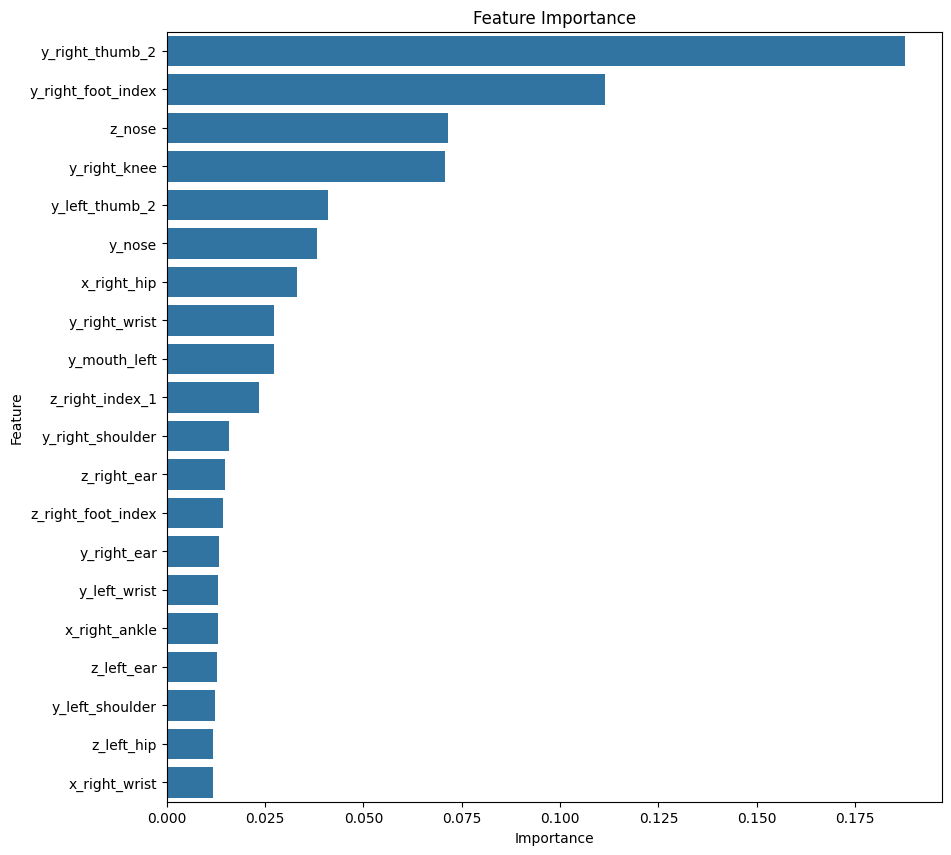

In [39]:
def decision_tree():
    # Getting the data
    df = get_data()
    # Splitting the data into X and y
    X = df.drop('exercise', axis=1)
    y = df['exercise']
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Creating a Decision Tree model
    decision_tree = DecisionTreeClassifier()
    # Fitting the model
    decision_tree.fit(X_train, y_train)
    # Getting the accuracy score
    print('The accuracy score is: ', accuracy_score(y_test, decision_tree.predict(X_test)))
    # Creating a confusion matrix
    print('The confusion matrix is: ', confusion_matrix(y_test, decision_tree.predict(X_test)))
    # Creating a classification report
    print('The classification report is: ', classification_report(y_test, decision_tree.predict(X_test)))


    # Putting the feature importance into a dataframe
    feature_importance = pd.DataFrame(decision_tree.feature_importances_, index=X.columns, columns=['Importance'])

    # Sorting the values to include top 20
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(20)

    # Plotting the feature importance
    plt.figure(figsize=(10, 10))
    sns.barplot(x=feature_importance['Importance'], y=feature_importance.index)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

decision_tree()

In [41]:
def get_data():
    # Bring in the data
    df = pd.read_csv('/content/sample_data/train.csv')
    # Drop pose_id column
    df.drop('pose_id', axis=1, inplace=True)
    # Creating a new column for the groups
    df['exercise'] = np.nan
    # If the pose contains the word 'squat' then the exercise is squats
    df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'
    df.loc[df['pose'].str.contains('jumping_jacks'), 'exercise'] = 'jumping jacks'
    df.loc[df['pose'].str.contains('pushup'), 'exercise'] = 'push ups'
    df.loc[df['pose'].str.contains('situp'), 'exercise'] = 'sit ups'
    df.loc[df['pose'].str.contains('pullups'), 'exercise'] = 'pull ups'
    # Dropping pose column
    df.drop('pose', axis=1, inplace=True)

    # going to use LabelEncoder to encode the exercise column
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['exercise'] = le.fit_transform(df['exercise'])

    return df

<ipython-input-41-c0b597833c67>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'squats' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'


The accuracy score is:  0.8818181818181818
The confusion matrix is:  [[50  3  0  0  6]
 [ 1 37  0  2  2]
 [ 0  2 40  0  0]
 [ 0  1  0 32  2]
 [ 6  1  0  0 35]]
The classification report is:                precision    recall  f1-score   support

           0       0.88      0.85      0.86        59
           1       0.84      0.88      0.86        42
           2       1.00      0.95      0.98        42
           3       0.94      0.91      0.93        35
           4       0.78      0.83      0.80        42

    accuracy                           0.88       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.88      0.88      0.88       220



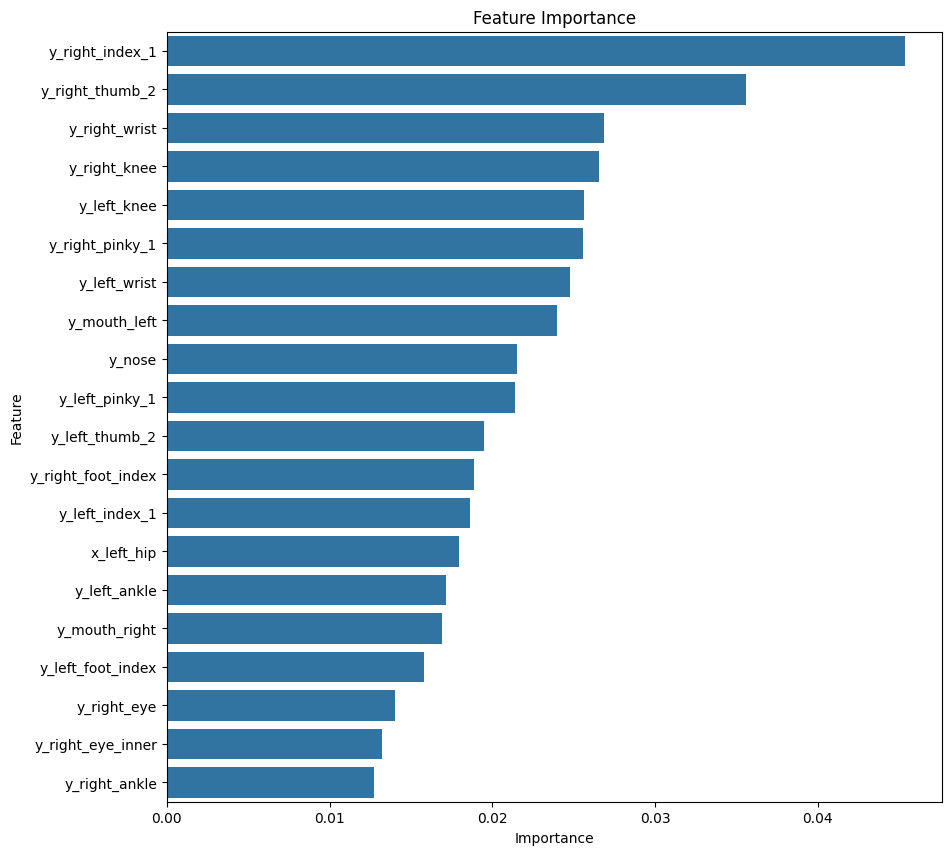

In [42]:
def random_forest():
    # Getting the data
    df = get_data()
    # Splitting the data into X and y
    X = df.drop('exercise', axis=1)
    y = df['exercise']
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Creating a Random Forest model
    random_forest = RandomForestClassifier()
    # Fitting the model
    random_forest.fit(X_train, y_train)
    # Getting the accuracy score
    print('The accuracy score is: ', accuracy_score(y_test, random_forest.predict(X_test)))
    # Creating a confusion matrix
    print('The confusion matrix is: ', confusion_matrix(y_test, random_forest.predict(X_test)))
    # Creating a classification report
    print('The classification report is: ', classification_report(y_test, random_forest.predict(X_test)))


    # Putting the feature importance into a dataframe
    feature_importance = pd.DataFrame(random_forest.feature_importances_, index=X.columns, columns=['Importance'])

    # Sorting the values to include top 20
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(20)

    # Plotting the feature importance
    plt.figure(figsize=(10, 10))
    sns.barplot(x=feature_importance['Importance'], y=feature_importance.index)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


random_forest()

In [50]:
def get_data():
    # Bring in the data
    df = pd.read_csv('/content/sample_data/train.csv')
    # Drop pose_id column
    df.drop('pose_id', axis=1, inplace=True)
    # Creating a new column for the groups
    df['exercise'] = np.nan
    # If the pose contains the word 'squat' then the exercise is squats
    df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'
    df.loc[df['pose'].str.contains('jumping_jacks'), 'exercise'] = 'jumping jacks'
    df.loc[df['pose'].str.contains('pushup'), 'exercise'] = 'push ups'
    df.loc[df['pose'].str.contains('situp'), 'exercise'] = 'sit ups'
    df.loc[df['pose'].str.contains('pullups'), 'exercise'] = 'pull ups'
    # Dropping pose column
    df.drop('pose', axis=1, inplace=True)

    # going to use LabelEncoder to encode the exercise column
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['exercise'] = le.fit_transform(df['exercise'])

    return df

<ipython-input-50-c0b597833c67>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'squats' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'


The accuracy score is:  0.8818181818181818
The confusion matrix is:  [[51  4  0  0  4]
 [ 0 35  0  1  6]
 [ 0  2 40  0  0]
 [ 0  1  0 31  3]
 [ 4  1  0  0 37]]
The classification report is:                precision    recall  f1-score   support

           0       0.93      0.86      0.89        59
           1       0.81      0.83      0.82        42
           2       1.00      0.95      0.98        42
           3       0.97      0.89      0.93        35
           4       0.74      0.88      0.80        42

    accuracy                           0.88       220
   macro avg       0.89      0.88      0.88       220
weighted avg       0.89      0.88      0.88       220



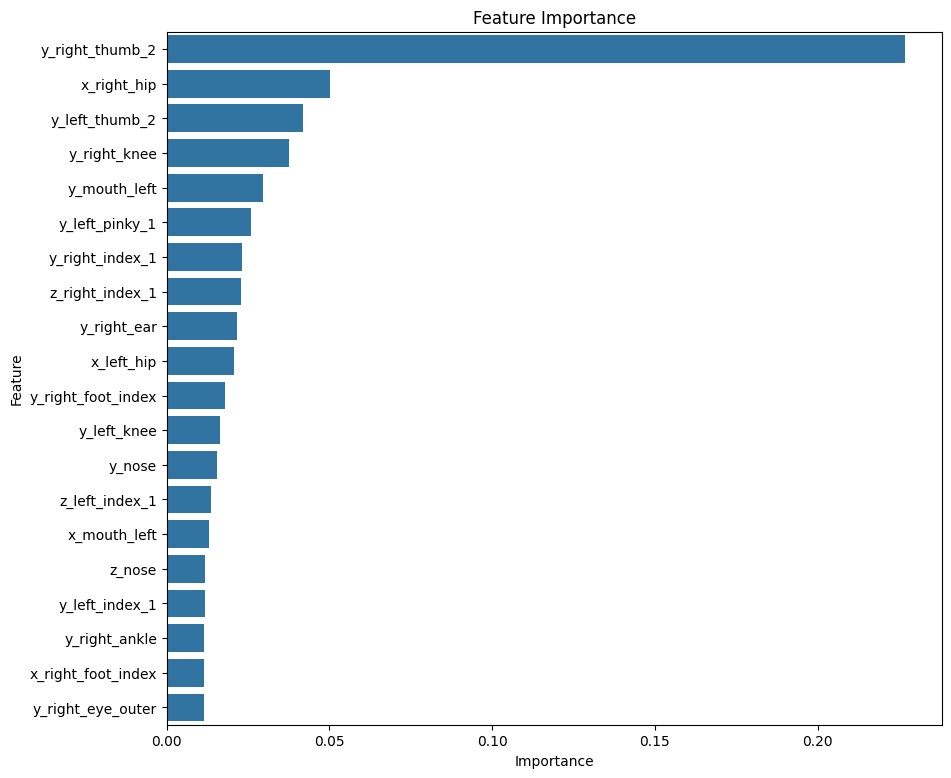

In [51]:
def xg_boost():
    """

    """
    # Getting the data
    df = get_data()
    # Splitting the data into X and y
    X = df.drop('exercise', axis=1)
    y = df['exercise']
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Creating a XGBoost model
    xg_boost = XGBClassifier()
    # Fitting the model
    xg_boost.fit(X_train, y_train)
    # Getting the accuracy score
    print('The accuracy score is: ', accuracy_score(y_test, xg_boost.predict(X_test)))
    # Creating a confusion matrix
    print('The confusion matrix is: ', confusion_matrix(y_test, xg_boost.predict(X_test)))
    # Creating a classification report
    print('The classification report is: ', classification_report(y_test, xg_boost.predict(X_test)))


    # Putting the feature importance into a dataframe
    feature_importance = pd.DataFrame(xg_boost.feature_importances_, index=X.columns, columns=['Importance'])

    # Sorting the values to include top 20
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(20)

    # Plotting the feature importance
    plt.figure(figsize=(10, 9))
    sns.barplot(x=feature_importance['Importance'], y=feature_importance.index)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

xg_boost()

In [52]:
def fit_xg_boost_classifier_all_data():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)


    # Creating a XGBClassifier object

    xgb = XGBClassifier(random_state=42)

    # Fitting the model
    xgb.fit(X_train, y_train)

    # Scoring the model
    score = xgb.score(X_test, y_test)

    # Getting the roc_auc_score
    roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test), average = 'macro', multi_class = 'ovr')

    print(f'accuracy_score: {score}')

    return roc_auc

fit_xg_boost_classifier_all_data()

<ipython-input-50-c0b597833c67>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'squats' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'


accuracy_score: 0.8818181818181818


np.float64(0.9853607106244533)

In [21]:
def fit_logistic_regression_scaled():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)

    # Scaling the data
    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Creating a logistic regression object
    lr = LogisticRegression(random_state=42)

    # Fitting the model
    lr.fit(X_train_sc, y_train)

    # Scoring the model
    score = lr.score(X_test, y_test)

    # getting the top 10 feature importances from the logistic regression model
    feature_importances = lr.coef_[0]

    # Creating a dictionary of feature importances
    feature_dict = dict(zip(X_train.columns, feature_importances))

    # Sorting the dictionary
    sorted_dict = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))

    # Getting the top features
    top_features_lr = list(sorted_dict.items())[:70]

    return score, top_features_lr

In [22]:
def fit_gradient_boosting_classifier():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)

    # Creating a GradientBoostingClassifier object
    gbc = GradientBoostingClassifier(random_state=42)

    # Fitting the model
    gbc.fit(X_train, y_train)

    # Scoring the model
    score = gbc.score(X_test, y_test)

    # getting the top 10 feature importances from the logistic regression model
    feature_importances = gbc.feature_importances_

    # Creating a dictionary of feature importances
    feature_dict = dict(zip(X_train.columns, feature_importances))

    # Sorting the dictionary
    sorted_dict = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))

    # Getting the top features
    top_features_gbc = list(sorted_dict.items())[:70]

    return score, top_features_gbc

In [23]:
def fit_random_forest_classifier():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)

    # Creating a RandomForestClassifier object
    rfc = RandomForestClassifier(random_state=42)

    # Fitting the model
    rfc.fit(X_train, y_train)

    # Scoring the model
    score = rfc.score(X_test, y_test)

    # getting the top 10 feature importances from the logistic regression model
    feature_importances = rfc.feature_importances_

    # Creating a dictionary of feature importances
    feature_dict = dict(zip(X_train.columns, feature_importances))

    # Sorting the dictionary
    sorted_dict = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))

    # Getting the top features
    top_features_rfc = list(sorted_dict.items())[:70]

    return score, top_features_rfc

In [24]:
def fit_xg_boost_classifier():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)

    # Creating a XGBClassifier object
    xgb = XGBClassifier(random_state=42)

    # Fitting the model
    xgb.fit(X_train, y_train)

    # Scoring the model
    score = xgb.score(X_test, y_test)

    # getting the top 10 feature importances from the logistic regression model
    feature_importances = xgb.feature_importances_

    # Creating a dictionary of feature importances
    feature_dict = dict(zip(X_train.columns, feature_importances))

    # Sorting the dictionary
    sorted_dict = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))

    # Getting the top features
    top_features_xgb = list(sorted_dict.items())[:70]

    return score, top_features_xgb

In [25]:
def get_top_features():


    # Getting the top features from the Logistic Regression model
    score_lr, top_features_lr = fit_logistic_regression_scaled()


    # Getting the top features from the GradientBoostingClassifier model
    score_gbc, top_features_gbc = fit_gradient_boosting_classifier()


    # Getting the top features from the RandomForestClassifier model
    score_rfc, top_features_rfc = fit_random_forest_classifier()


    # Getting the top features from the XGBClassifier model
    score_xgb, top_features_xgb = fit_xg_boost_classifier()

    top_features = []
    for i in range(70):
        top_features.append(top_features_lr[i][0])
        top_features.append(top_features_gbc[i][0])
        top_features.append(top_features_rfc[i][0])
        top_features.append(top_features_xgb[i][0])

    # Getting unique features
    top_features = list(set(top_features))


    return top_features

In [46]:
def fit_xg_boost_classifier_incremental():
    # Setting random seed
    np.random.seed(42)

    df = get_data()

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop('exercise', axis=1), df['exercise'], test_size=0.2)

    features = get_top_features()

    # Creating a XGBClassifier object

    xgb = XGBClassifier(random_state=42)

    # Creating a list to store the roc_auc_score
    roc_auc_scores = []

    # Creating a list to store the features
    feature_list = []

    # Looping through the top features
    for feature in features:
        # Adding the feature to the feature list
        feature_list.append(feature)

        # Fitting the model
        xgb.fit(X_train[feature_list], y_train)

        # Scoring the model
        score = xgb.score(X_test[feature_list], y_test)

        # Getting the roc_auc_score
        roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test[feature_list]), average = 'macro', multi_class = 'ovr')

        # Adding the score to the list if there is no score or if the score is greater than the previous score
        if len(roc_auc_scores) == 0 or roc_auc > roc_auc_scores[-1]:

            # Appending the roc_auc_score to the roc_auc_scores list
            roc_auc_scores.append(roc_auc)
        else:
            # Removing the feature from the feature list
            feature_list.remove(feature)


    # Creating a dictionary of the feature list and the roc_auc_score
    feature_dict = dict(zip(feature_list, roc_auc_scores))

    # Sorting the dictionary
    sorted_dict = dict(sorted(feature_dict.items(), key=lambda x: x[1], reverse=True))

    # Getting the top features
    top_features_xgb = list(sorted_dict.items())[:70]

    print("{0:.3f}".format(score))

    return top_features_xgb

In [53]:
fit_xg_boost_classifier_incremental()

<ipython-input-50-c0b597833c67>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'squats' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'
<ipython-input-50-c0b597833c67>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'squats' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['pose'].str.contains('squat'), 'exercise'] = 'squats'
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the 

0.914


[('y_right_ankle', np.float64(0.9918592924699423)),
 ('y_mouth_right', np.float64(0.9914903115783942)),
 ('y_right_elbow', np.float64(0.9913755238256575)),
 ('z_left_hip', np.float64(0.9895820189638345)),
 ('x_right_ear', np.float64(0.9894763419564327)),
 ('y_right_eye', np.float64(0.9894138701618355)),
 ('y_mouth_left', np.float64(0.9893473219875645)),
 ('y_left_knee', np.float64(0.986383573399413)),
 ('z_left_eye_inner', np.float64(0.9858848541081159)),
 ('x_right_thumb_2', np.float64(0.9858608787978929)),
 ('x_right_ankle', np.float64(0.9857053401426233)),
 ('x_mouth_right', np.float64(0.9847554443826624)),
 ('z_right_hip', np.float64(0.9831954816027911)),
 ('y_left_heel', np.float64(0.9786006825125337)),
 ('x_left_elbow', np.float64(0.9729357894807624)),
 ('x_left_heel', np.float64(0.9694158801655842)),
 ('y_right_thumb_2', np.float64(0.9603122055213168)),
 ('y_right_heel', np.float64(0.9559008879107906)),
 ('x_right_knee', np.float64(0.9544123908770809)),
 ('z_mouth_right', np.flo